In [1]:
!mkdir -p ~/.kaggle
!mv kaggle.json ~/.kaggle/

In [2]:
!kaggle datasets download -d justin900429/3d-printer-defected-dataset

 98% 52.0M/52.8M [00:06<00:00, 10.1MB/s]
100% 52.8M/52.8M [00:06<00:00, 8.38MB/s]


In [3]:
!unzip \*.zip

Archive:  3d-printer-defected-dataset.zip
  inflating: defected/bed_not_stick_0.jpg  
  inflating: defected/bed_not_stick_1.jpg  
  inflating: defected/bed_not_stick_10.jpg  
  inflating: defected/bed_not_stick_11.jpg  
  inflating: defected/bed_not_stick_12.jpg  
  inflating: defected/bed_not_stick_13.jpg  
  inflating: defected/bed_not_stick_14.jpg  
  inflating: defected/bed_not_stick_15.jpg  
  inflating: defected/bed_not_stick_16.jpg  
  inflating: defected/bed_not_stick_17.jpg  
  inflating: defected/bed_not_stick_18.jpg  
  inflating: defected/bed_not_stick_19.jpg  
  inflating: defected/bed_not_stick_2.jpg  
  inflating: defected/bed_not_stick_20.jpg  
  inflating: defected/bed_not_stick_21.jpg  
  inflating: defected/bed_not_stick_22.jpg  
  inflating: defected/bed_not_stick_23.jpg  
  inflating: defected/bed_not_stick_24.jpg  
  inflating: defected/bed_not_stick_25.jpg  
  inflating: defected/bed_not_stick_26.jpg  
  inflating: defected/bed_not_stick_27.jpg  
  inflating: def

In [4]:
import os
import cv2
import numpy as np
import tensorflow as tf
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [5]:
# Set the path to the folders containing cat and dog images
defect_folder = '/content/defected'
no_defect_folder = '/content/no_defected'

In [6]:
# Function to load and preprocess the images
def load_images(folder, label):
    images = []
    labels = []
    for filename in os.listdir(folder):
        img_path = os.path.join(folder, filename)
        img = cv2.imread(img_path)
        img = cv2.resize(img, (224, 224))  # Resize the image to 224x224 pixels
        img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)  # Convert the image to RGB format
        images.append(img)
        labels.append(label)
    return images, labels

In [7]:
# Load and preprocess cat images
defect_images, defect_labels = load_images(defect_folder, 0)

# Load and preprocess dog images
no_defect_images, no_defect_labels = load_images(no_defect_folder, 1)

In [8]:
images = defect_images + no_defect_images
labels = defect_labels + no_defect_labels

images = np.array(images)
labels = np.array(labels)

In [9]:
train_images, test_images, train_labels, test_labels = train_test_split(images, labels, test_size=0.2, random_state=42)


In [10]:

train_images, val_images, train_labels, val_labels = train_test_split(train_images, train_labels, test_size=0.2, random_state=42)

In [11]:
datagen = ImageDataGenerator(
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    horizontal_flip=True,)

In [12]:
datagen.fit(train_images)

In [13]:
from tensorflow.keras.regularizers import l2
from tensorflow.keras.layers import Dropout

# Define the CNN model architecture with regularization and dropout
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=(224, 224, 3), kernel_regularizer=l2(0.01)),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Conv2D(64, (3, 3), activation='relu', kernel_regularizer=l2(0.01)),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Conv2D(128, (3, 3), activation='relu', kernel_regularizer=l2(0.01)),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(64, activation='relu', kernel_regularizer=l2(0.01)),
    tf.keras.layers.Dropout(0.5),  # Add dropout layer
    tf.keras.layers.Dense(1, activation='sigmoid', kernel_regularizer=l2(0.01))
])

In [15]:
from tensorflow.keras.callbacks import EarlyStopping
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# early_stopping = EarlyStopping(monitor='val_accuracy', patience=3, restore_best_weights=True)

# Train the model with early stopping
history = model.fit(datagen.flow(train_images, train_labels, batch_size=32),
                    epochs=20,
                    validation_data=(val_images, val_labels),
                    )



Epoch 1/20
32/32 [==============================] - 13s 349ms/step - loss: 1.3408 - accuracy: 0.4930 - val_loss: 0.9769 - val_accuracy: 0.4940
Epoch 2/20
32/32 [==============================] - 11s 329ms/step - loss: 0.9132 - accuracy: 0.5251 - val_loss: 0.8761 - val_accuracy: 0.4940
Epoch 3/20
32/32 [==============================] - 11s 356ms/step - loss: 0.8845 - accuracy: 0.5201 - val_loss: 0.8561 - val_accuracy: 0.4940
Epoch 4/20
32/32 [==============================] - 12s 362ms/step - loss: 0.8814 - accuracy: 0.5633 - val_loss: 0.8637 - val_accuracy: 0.4940
Epoch 5/20
32/32 [==============================] - 12s 369ms/step - loss: 0.8892 - accuracy: 0.6627 - val_loss: 0.6673 - val_accuracy: 0.8434
Epoch 6/20
32/32 [==============================] - 12s 375ms/step - loss: 0.7616 - accuracy: 0.7570 - val_loss: 0.5640 - val_accuracy: 0.8956
Epoch 7/20
32/32 [==============================] - 12s 363ms/step - loss: 0.6545 - accuracy: 0.8102 - val_loss: 0.4716 - val_accuracy: 0.9076

In [16]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 222, 222, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 111, 111, 32)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 109, 109, 64)      18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 54, 54, 64)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 52, 52, 128)       73856     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 26, 26, 128)      0

In [17]:
loss, accuracy = model.evaluate(test_images, test_labels)
print("Test Loss:", loss)
print("Test Accuracy:", accuracy)

10/10 [==============================] - 1s 53ms/step - loss: 0.2682 - accuracy: 0.9583
Test Loss: 0.268220990896225
Test Accuracy: 0.9583333134651184


In [18]:
from sklearn.metrics import confusion_matrix
# Generate predictions
predictions = model.predict(test_images)
predicted_labels = np.round(predictions).flatten()

# Generate confusion matrix
cm = confusion_matrix(test_labels, predicted_labels)
print("Confusion Matrix:")
print(cm)

10/10 [==============================] - 0s 16ms/step
Confusion Matrix:
[[151   9]
 [  4 148]]


In [19]:
TP = cm[1, 1]
TN = cm[0, 0]
FP = cm[0, 1]
FN = cm[1, 0]

In [20]:
# Calculate accuracy
accuracy = (TP + TN) / (TP + TN + FP + FN)

# Calculate precision
precision = TP / (TP + FP)

# Calculate recall
recall = TP / (TP + FN)

# Calculate F1 score
f1_score = 2 * (precision * recall) / (precision + recall)

# Print the results
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1_score)

Accuracy: 0.9583333333333334
Precision: 0.9426751592356688
Recall: 0.9736842105263158
F1 Score: 0.9579288025889969


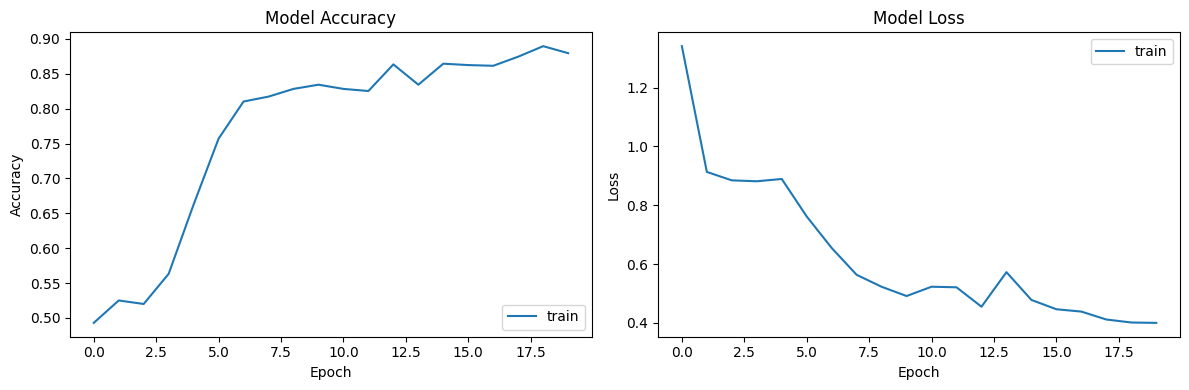

In [21]:
# Plot accuracy and loss
plt.figure(figsize=(12, 4))

# Accuracy plot
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'])
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['train', 'test'], loc='lower right')

# Loss plot
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'])
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['train', 'test'], loc='upper right')

plt.tight_layout()
plt.show()

In [22]:
model.save("classi_def.h5")

In [23]:
folders = ['bed_not_stick', 'no_bottom','no_support','leg_broken']

In [24]:
labels = np.arange(len(folders))

In [26]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [27]:
folder_paths = [os.path.join('/content/drive/MyDrive/3d_dataset', folder) for folder in folders]


In [28]:
images = []
all_labels = []
for folder_path, label in zip(folder_paths, labels):
    folder_images, folder_labels = load_images(folder_path, label)
    images.extend(folder_images)
    all_labels.extend(folder_labels)

In [29]:
# Convert images and labels to numpy arrays
images = np.array(images)
all_labels = np.array(all_labels)

In [30]:
train_images, test_images, train_labels, test_labels = train_test_split(images, all_labels, test_size=0.2, random_state=43)

In [ ]:
train_images, val_images, train_labels, val_labels = train_test_split(train_images, train_labels, test_size=0.2, random_state=42)

In [31]:
datagen = ImageDataGenerator(
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    horizontal_flip=True,

    # preprocessing_function=lambda img: cv2.cvtColor(cv2.Canny(cv2.GaussianBlur(img.astype(np.uint8), (5, 5), 0), 100, 200), cv2.COLOR_GRAY2RGB)  # Apply Canny edge detection after Gaussian blur
)

In [32]:
class_weights = dict(enumerate(len(train_labels) / (len(folders) * np.bincount(train_labels))))

In [33]:
datagen.fit(train_images)

In [34]:
from tensorflow.keras.regularizers import l2
from tensorflow.keras.layers import Dropout

# Define the CNN model architecture with regularization and dropout
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=(224, 224, 3), kernel_regularizer=l2(0.01)),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Conv2D(64, (3, 3), activation='relu', kernel_regularizer=l2(0.01)),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Conv2D(128, (3, 3), activation='relu', kernel_regularizer=l2(0.01)),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(64, activation='relu', kernel_regularizer=l2(0.01)),
    tf.keras.layers.Dropout(0.5),  # Add dropout layer
    tf.keras.layers.Dense(4, activation='softmax', kernel_regularizer=l2(0.01))
])

In [40]:
from tensorflow.keras.callbacks import EarlyStopping
model.compile(optimizer='Adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

early_stopping = EarlyStopping(monitor='val_accuracy', patience=3, restore_best_weights=True)

# Train the model with early stopping
history = model.fit(datagen.flow(train_images, train_labels, batch_size=32),
                    epochs=20,
                    validation_data=(val_images, val_labels),
                     class_weight=class_weights, callbacks=[early_stopping])

Epoch 1/20
19/19 [==============================] - 11s 368ms/step - loss: 0.7784 - accuracy: 0.8781 - val_loss: 11.4566 - val_accuracy: 0.0602
Epoch 2/20
19/19 [==============================] - 8s 430ms/step - loss: 0.9500 - accuracy: 0.8484 - val_loss: 13.3082 - val_accuracy: 0.0683
Epoch 3/20
19/19 [==============================] - 7s 361ms/step - loss: 0.8368 - accuracy: 0.8731 - val_loss: 14.9586 - val_accuracy: 0.0763
Epoch 4/20
19/19 [==============================] - 9s 457ms/step - loss: 0.7662 - accuracy: 0.8880 - val_loss: 11.3717 - val_accuracy: 0.0803
Epoch 5/20
19/19 [==============================] - 8s 396ms/step - loss: 0.8362 - accuracy: 0.8600 - val_loss: 9.9281 - val_accuracy: 0.0803
Epoch 6/20
19/19 [==============================] - 7s 371ms/step - loss: 0.7493 - accuracy: 0.8913 - val_loss: 10.4851 - val_accuracy: 0.1928
Epoch 7/20
19/19 [==============================] - 7s 373ms/step - loss: 0.7571 - accuracy: 0.8979 - val_loss: 13.9297 - val_accuracy: 0.0602

In [45]:
test_loss,test_acc= model.evaluate(test_images,test_labels)

5/5 [==============================] - 0s 20ms/step - loss: 0.6797 - accuracy: 0.8947


In [50]:
model.save("defect_categ2.h5")

In [52]:
from tensorflow.keras.models import load_model

In [55]:
model= load_model("defect_categ2.h5")

In [53]:
model.evaluate(test_images, test_labels)

5/5 [==============================] - 0s 19ms/step - loss: 0.6797 - accuracy: 0.8947


[0.6797318458557129, 0.8947368264198303]

In [54]:
model.evaluate(train_images,train_labels)

19/19 [==============================] - 0s 17ms/step - loss: 0.6407 - accuracy: 0.9110


[0.6406537890434265, 0.9110378623008728]

5/5 [==============================] - 0s 16ms/step


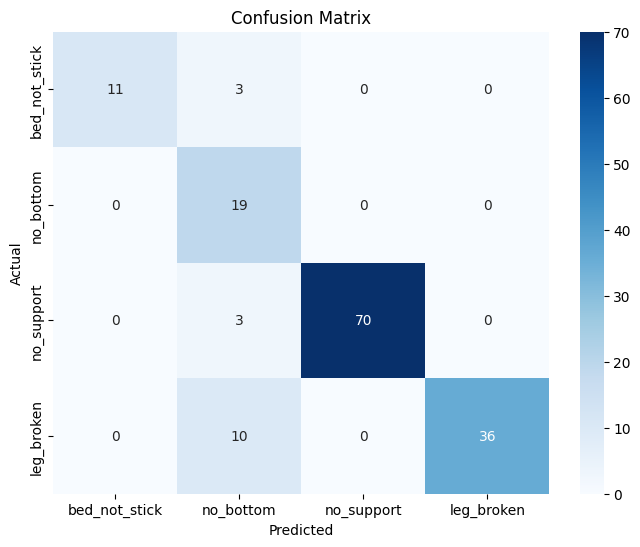

In [56]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

predictions = np.argmax(model.predict(test_images), axis=-1)

cm = confusion_matrix(test_labels, predictions)
class_labels = ['bed_not_stick', 'no_bottom','no_support','leg_broken']

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=class_labels, yticklabels=class_labels)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()